In [22]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load EDF file
raw = mne.io.read_raw_edf("/media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/INNOVATEX/Dataset/S001R13.edf", preload=True)  # Replace with your file path
data, times= raw[:, :] 
fs = raw.info['sfreq']  # Get sampling frequency (e.g., 160 Hz)

Extracting EDF parameters from /media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/INNOVATEX/Dataset/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [24]:
# Get annotations
annotations = raw.annotations
print(annotations)

<Annotations | 30 segments: T0 (15), T1 (7), T2 (8)>


In [25]:
# Initialize labels array (default to 0 for T0/No Stress)
labels = np.zeros(len(raw.times), dtype=int)
print(labels)

[0 0 0 ... 0 0 0]


In [26]:
# Set labels based on annotations
for ann in annotations:
    start_time = ann['onset']
    duration = ann['duration']
    description = ann['description']
    
    # Convert time to samples
    start_sample = int(start_time * fs)
    end_sample = start_sample + int(duration * fs)
    
    # Set label based on annotation type
    if description in ['T1', 'T2']:
        labels[start_sample:end_sample] = 1  # Stress state
print(labels[:]=='1')

[False False False ... False False False]


In [27]:
# Create DataFrame with EEG data and labels
df = pd.DataFrame(data.T, columns=raw.ch_names)
df_cleaned = df.applymap(lambda x: float(str(x).replace("+AC0-", "-").replace("+", "").replace('−', '-').strip()) if isinstance(x, str) else float(x) if isinstance(x, int) else x)
df_cleaned["timestamp"] = raw.times
df_cleaned["label"] = labels[:len(raw.times)]  # Trim to match data length
# Save to CSV
df_cleaned.to_csv("/media/sudarshan/Windows-SSD/Users/sudar/OneDrive/Documents/Neuro Calm Updated/Model 1/new_eeg_labeled_dataset2.csv", index=False)
print("CSV file generated successfully!")
print(df_cleaned["timestamp"])
print(df_cleaned["label"])

/tmp/ipykernel_474372/313272909.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: float(str(x).replace("+AC0-", "-").replace("+", "").replace('−', '-').strip()) if isinstance(x, str) else float(x) if isinstance(x, int) else x)


CSV file generated successfully!
0          0.00000
1          0.00625
2          0.01250
3          0.01875
4          0.02500
           ...    
19995    124.96875
19996    124.97500
19997    124.98125
19998    124.98750
19999    124.99375
Name: timestamp, Length: 20000, dtype: float64
0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: label, Length: 20000, dtype: int64


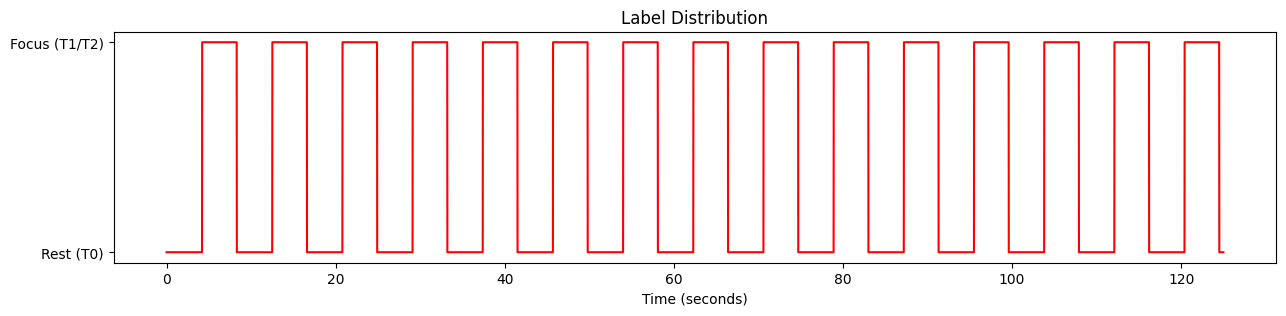

In [28]:
plt.figure(figsize=(15, 3))
plt.plot(df_cleaned['timestamp'], df_cleaned['label'], color='red')
plt.yticks([0, 1], ["Rest (T0)", "Focus (T1/T2)"])
plt.xlabel("Time (seconds)")
plt.title("Label Distribution")
plt.show()